Soukaina Yassir G2

In [ ]:
import    numpy    as    np   
import    pandas    as    pd   
import    matplotlib.pyplot    as    plt   
import    seaborn    as    sns   
from    sklearn.feature_extraction.text    import    CountVectorizer   
from    sklearn.metrics.pairwise    import    cosine_similarity

In [ ]:
df=pd.read_csv(  '/content/drive/MyDrive/disney2.csv.csv'  )

Cette commande pour appeller notre dataset 

In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


Cette commande pour afficher les premiers lignes

In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...
1449,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,"April 1, 2020",2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.


Cette commande pour afficher les derniers lignes

In [ ]:
df.shape

(1450, 12)

Cette commande pour afficher le forma du dataset.Il affiche le nombre du ligne et du colonne , 12 c'est le nombre du colonne et 1450 le nombre nombre de ligne

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


Ici, nous vérifions les types de données car parfois l'Id ou la date serait stocké sous forme de chaîne, si dans ce cas, nous devons convertir cette chaîne en données entières uniquement, nous pouvons alors tracer les données via un graphique.

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

ici on a changer le type du colonne date-added du 'object' à 'datetime'  

In [ ]:
print(df.isnull().sum())

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64


ce code est utilisée pour afficher le nombre de valeurs nulles 

In [ ]:
#df = df.dropna()    # Dropping the missing values.
#df.count()

Pour cette commande on a supprimer les lignes ou il y a la valeur 'NaN'

In [ ]:
df = df.rename(columns={"show_id": "Id","date_added":"date_add","release_year":"rls_year","listed_in":"category" })
df.head()

,Id,type,title,director,cast,country,date_add,rls_year,rating,duration,category,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021-11-25,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


ce code est utilisé pour renommer les colonnes d'un DataFrame 
Il utilise la méthode rename() sur le DataFrame df et spécifie les nouvelles noms de colonnes à l'aide d'un dictionnaire. Dans cet exemple, les colonnes "show_id", "date_added", "release_year" et "listed_in" sont renommées respectivement en "Id", "date_add", "rls_year" et "category"

In [ ]:
all_categories = []
for category in df['category']:
    if isinstance(category, str):
        all_categories += category.split(', ')

La boucle for parcourt chaque valeur de la colonne 'category' et vérifie si la valeur est de type chaîne de caractères (str) à l'aide de la fonction isinstance(). Si c'est le cas, la méthode split() est utilisée pour séparer la chaîne en une liste de catégories individuelles, en utilisant la virgule suivie d'un espace comme délimiteur. Cette liste de catégories est ensuite ajoutée à la liste all_categories à l'aide de l'opérateur d'ajout '+='

In [ ]:
category_counts = pd.Series(all_categories).value_counts()

Ce code crée une série category_counts à partir de la liste all_categories créée précédemment. La série category_counts contiendra le décompte du nombre d'occurrences de chaque catégorie dans la liste.

La fonction pd.Series() est utilisée pour créer une série à partir de la liste all_categories. Ensuite, la méthode value_counts() est appliquée à cette série, ce qui compte le nombre d'occurrences de chaque valeur unique de la série et les organise par ordre décroissant.

Ainsi, category_counts sera une série qui contiendra chaque catégorie unique extraite de la colonne 'category' du DataFrame df, avec le nombre d'occurrences correspondant à chaque catégorie.

In [ ]:
top_categories = category_counts.head(5)
for category, count in top_categories.items():
    print(category, ':', count)

Family : 632
Animation : 542
Comedy : 526
Action-Adventure : 452
Animals & Nature : 208



Ce code extrait les cinq premières catégories les plus fréquentes à partir de la série category_counts, puis les affiche avec leur décompte correspondant à l'aide de la boucle for et l'instruction print().

La variable top_categories contient les cinq premières lignes de la série category_counts, qui correspondent aux catégories les plus fréquentes. La méthode head(5) est utilisée pour extraire les cinq premières lignes.

Ensuite, la boucle for parcourt chaque élément de top_categories. À chaque itération, la variable category reçoit le nom de la catégorie, et la variable count reçoit le décompte correspondant. L'instruction print(category, ':', count) affiche le nom de la catégorie suivi de son décompte.

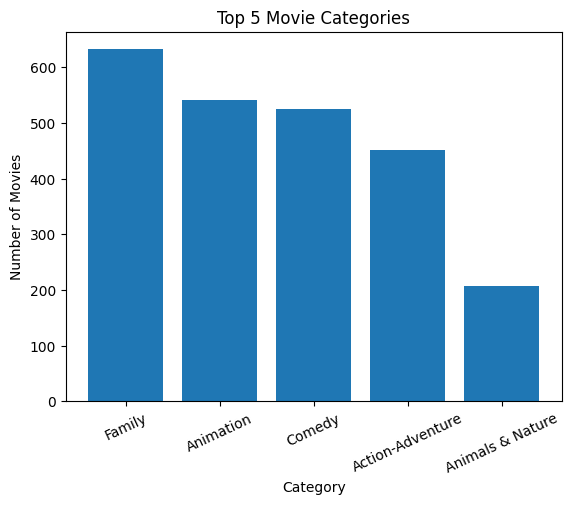

In [ ]:
plt.bar(top_categories.index,top_categories.values)
plt.title('Top 5 Movie Categories')
plt.xlabel('Category')
plt.xticks(rotation=25)
plt.ylabel('Number of Movies')
plt.show()


ce code utilise la bibliothèque matplotlib pour créer un diagramme à barres des cinq premières catégories de films les plus fréquentes.

La première ligne plt.bar(top_categories.index,top_categories.values) crée le diagramme à barres en utilisant les indices des catégories (top_categories.index) comme valeurs de l'axe des abscisses et les décomptes correspondants (top_categories.values) comme valeurs de l'axe des ordonnées.

Ensuite, les lignes suivantes sont utilisées pour ajouter des éléments supplémentaires au graphique :

plt.title('Top 5 Movie Categories') ajoute un titre au graphique.
plt.xlabel('Category') définit le label de l'axe des abscisses.
plt.xticks(rotation=25) fait pivoter les étiquettes des catégories de 25 degrés pour améliorer la lisibilité.
plt.ylabel('Number of Movies') définit le label de l'axe des ordonnées.
Enfin, plt.show() affiche le graphique à l'écran.

In [ ]:
all_cast	 = []
for cast in df['cast']:
    if isinstance(cast	, str):
        all_cast+= cast.split(', ')

Ce code crée une liste all_cast qui contient tous les noms de casting de la colonne 'cast' du DataFrame df.

La boucle for parcourt chaque valeur de la colonne 'cast' et vérifie si la valeur est de type chaîne de caractères (str) à l'aide de la fonction isinstance(). Si c'est le cas, la méthode split() est utilisée pour séparer la chaîne en une liste de noms de casting individuels, en utilisant la virgule suivie d'un espace comme délimiteur. Cette liste de noms de casting est ensuite ajoutée à la liste all_cast à l'aide de l'opérateur d'ajout +=.

À la fin de l'exécution de cette boucle, la liste all_cast contiendra tous les noms de casting uniques présents dans la colonne 'cast' du DataFrame df.

In [ ]:
cast_counts = pd.Series(all_cast	).value_counts()


Ce code crée une série cast_counts à partir de la liste all_cast créée précédemment. La série cast_counts contiendra le décompte du nombre d'occurrences de chaque nom de casting dans la liste.

La fonction pd.Series() est utilisée pour créer une série à partir de la liste all_cast. Ensuite, la méthode value_counts() est appliquée à cette série, ce qui compte le nombre d'occurrences de chaque valeur unique de la série et les organise par ordre décroissant.

Ainsi, cast_counts sera une série qui contiendra chaque nom de casting unique extrait de la colonne 'cast' du DataFrame df, avec le nombre d'occurrences correspondant à chaque nom de casting.

In [ ]:
top_cast= cast_counts.head(10)
for cast,count in top_cast.items():
    print(cast,':', count)


Jim Cummings : 33
Walt Disney : 20
Bill Farmer : 18
Larry the Cable Guy  : 17
Tress MacNeille : 16
Corey Burton : 16
Keith Ferguson : 16
Pinto Colvig : 15
Bob Peterson : 15
Jeff Bennett : 15



Ce code extrait les dix premiers noms de casting les plus fréquents à partir de la série cast_counts et les affiche avec leur décompte correspondant à l'aide de la boucle for et l'instruction print().

La variable top_cast contient les dix premières lignes de la série cast_counts, qui correspondent aux noms de casting les plus fréquents. La méthode head(10) est utilisée pour extraire les dix premières lignes.

Ensuite, la boucle for parcourt chaque élément de top_cast. À chaque itération, la variable cast reçoit le nom du casting, et la variable count reçoit le décompte correspondant. L'instruction print(cast, ':', count) affiche le nom du casting suivi de son décompte.

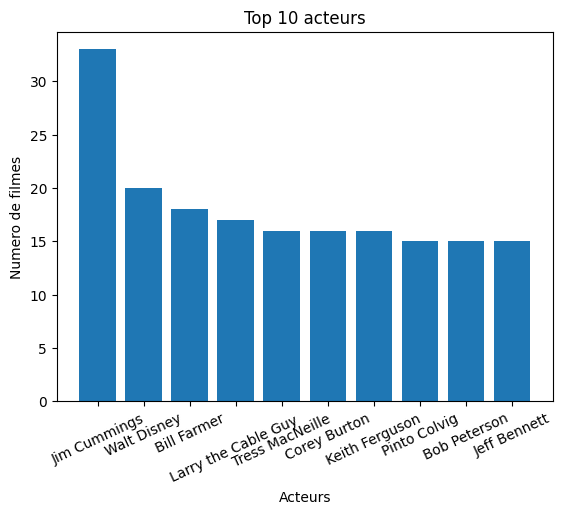

In [ ]:
plt.bar(top_cast.index, top_cast.values)
plt.title('Top 10 acteurs')
plt.xlabel('Acteurs')
plt.xticks(rotation=25)
plt.ylabel('Numero de filmes')
plt.show()

le meme fonctionement du premier graf

In [ ]:
all_director = []
for director in df['director']:
    if isinstance(director, str):
        all_director += director.split(",")

Ce code crée une liste all_director qui contient tous les noms de réalisateurs de la colonne 'director' du DataFrame df.

La boucle for parcourt chaque valeur de la colonne 'director' et vérifie si la valeur est de type chaîne de caractères (str) à l'aide de la fonction isinstance(). Si c'est le cas, la méthode split(",") est utilisée pour séparer la chaîne en une liste de noms de réalisateurs individuels, en utilisant la virgule comme délimiteur. Cette liste de noms de réalisateurs est ensuite ajoutée à la liste all_director à l'aide de l'opérateur d'ajout +=.

In [ ]:
director_counts = pd.Series(all_director).value_counts()
top_directors = director_counts.head(5)
for director, count in top_directors.items():
    print(director, ':', count)

Jack Hannah : 17
John Lasseter : 16
Paul Hoen : 16
Wilfred Jackson : 14
Charles Nichols : 12



Ce code extrait les cinq premiers réalisateurs les plus fréquents à partir de la série director_counts, puis les affiche avec leur décompte correspondant à l'aide de la boucle for et l'instruction print().

La variable director_counts contient le décompte du nombre d'occurrences de chaque nom de réalisateur dans la liste all_director. La méthode value_counts() est utilisée pour créer cette série de décompte.

Ensuite, la variable top_directors contient les cinq premières lignes de la série director_counts, qui correspondent aux réalisateurs les plus fréquents. La méthode head(5) est utilisée pour extraire les cinq premières lignes.

La boucle for parcourt chaque élément de top_directors. À chaque itération, la variable director reçoit le nom du réalisateur, et la variable count reçoit le décompte correspondant. L'instruction print(director, ':', count) affiche le nom du réalisateur suivi de son décompte.

<ipython-input-48-d07324d23f34>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



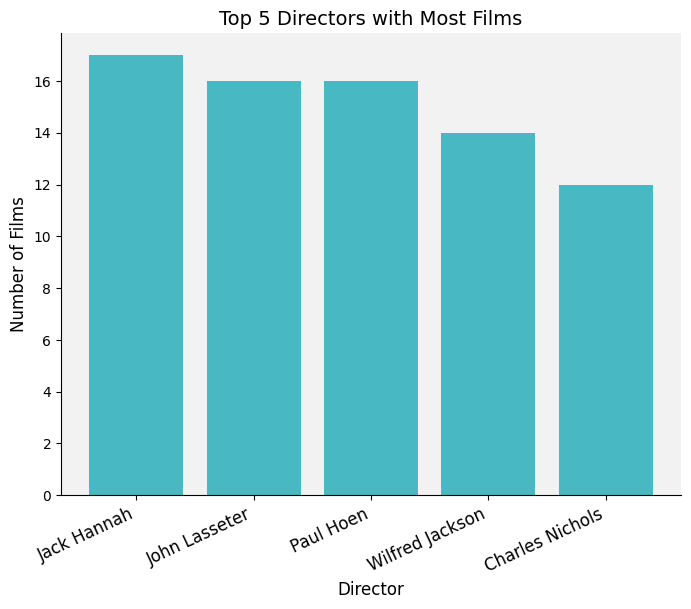

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(top_directors.index, top_directors.values, color='#00a0b0', alpha=0.7)
ax.set_title('Top 5 Directors with Most Films', fontsize=14)
ax.set_xlabel('Director', fontsize=12)
ax.set_ylabel('Number of Films', fontsize=12)

ax.set_xticklabels(top_directors.index, rotation=25, ha='right', fontsize=12)
ax.set_facecolor('#f2f2f2')
sns.despine(top=True, right=True)

plt.show()

ce code utilise la bibliothèque Matplotlib et Seaborn pour créer un graphique à barres horizontales des cinq réalisateurs les plus fréquents.

La première ligne fig, ax = plt.subplots(figsize=(8,6)) crée une figure et un axe pour le graphique avec une taille de figure de 8 pouces de largeur et 6 pouces de hauteur.

Ensuite, ax.bar(top_directors.index, top_directors.values, color='#00a0b0', alpha=0.7) crée le graphique à barres horizontales en utilisant les indices des réalisateurs (top_directors.index) comme valeurs de l'axe des abscisses et les décomptes correspondants (top_directors.values) comme valeurs de l'axe des ordonnées. La couleur des barres est définie sur "#00a0b0" et l'opacité est réglée sur 0,7.

Les lignes suivantes sont utilisées pour personnaliser le graphique :

ax.set_title('Top 5 Directors with Most Films', fontsize=14) définit le titre du graphique avec une taille de police de 14.

ax.set_xlabel('Director', fontsize=12) définit le label de l'axe des abscisses avec une taille de police de 12.

ax.set_ylabel('Number of Films', fontsize=12) définit le label de l'axe des ordonnées avec une taille de police de 12.

ax.set_xticklabels(top_directors.index, rotation=25, ha='right', fontsize=12) définit les étiquettes des réalisateurs sur l'axe des abscisses en utilisant les noms des réalisateurs (top_directors.index). Les étiquettes sont pivotées de 25 degrés, alignées à droite (ha='right') et ont une taille de police de 12.

ax.set_facecolor('#f2f2f2') définit la couleur de fond de l'axe.

sns.despine(top=True, right=True) supprime les contours du graphique à gauche et en bas.

Enfin, plt.show() affiche le graphique à l'écran

In [ ]:
tv_shows = df[df["type"] == "TV Show"]
tv_shows_sorted = tv_shows.sort_values("duration", ascending=False)
top_5_tv_shows = tv_shows_sorted.head(5)
print("Les cinq meilleures séries télévisées avec le plus grand nombre de saisons sont :")
print(top_5_tv_shows[["Id","title", "duration"]])

Les cinq meilleures séries télévisées avec le plus grand nombre de saisons sont :
       Id                           title   duration
553  s554  America's Funniest Home Videos  9 Seasons
125  s126        Dr. K's Exotic Animal ER  9 Seasons
557  s558                     Brain Games  8 Seasons
285  s286                         Car SOS  8 Seasons
759  s760                 Boy Meets World  7 Seasons


ce code sélectionne toutes les lignes dans le DataFrame df où la valeur de la colonne "type" est "TV Show", puis trie les résultats en ordre décroissant de la durée de la série (colonne "duration") et stocke le résultat dans le DataFrame tv_shows_sorted. Ensuite, les cinq premières lignes de ce DataFrame sont extraites et stockées dans top_5_tv_shows.

La ligne print("Les cinq meilleures séries télévisées avec le plus grand nombre de saisons sont :") imprime simplement un message pour introduire la liste des cinq meilleures séries télévisées.

Enfin, la ligne print(top_5_tv_shows[["Id","title", "duration"]]) imprime les identifiants, les titres et les durées des cinq meilleures séries télévisées avec le plus grand nombre de saisons.

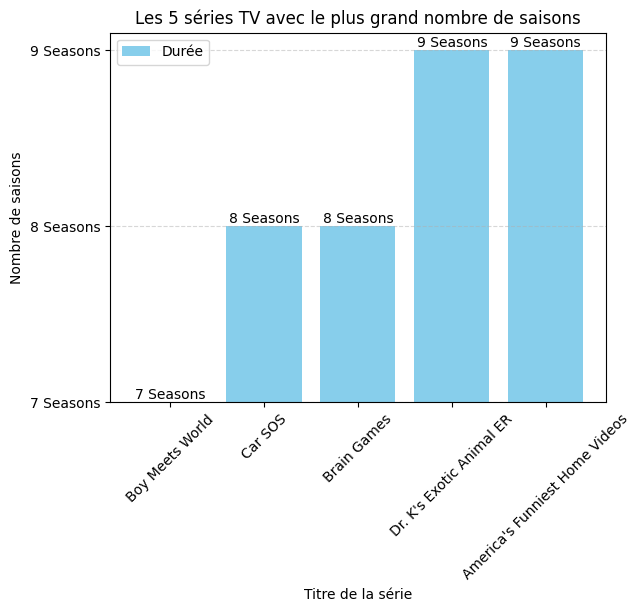

In [ ]:
tv_shows = df[df["type"] == "TV Show"]
tv_shows_sorted = tv_shows.sort_values("duration", ascending=False)
top_tv_shows = tv_shows_sorted.head(5)

top_tv_shows = top_tv_shows.iloc[::-1]

plt.bar(top_tv_shows["title"], top_tv_shows["duration"], color='skyblue')

plt.title("Les 5 séries TV avec le plus grand nombre de saisons")
plt.xlabel("Titre de la série")
plt.ylabel("Nombre de saisons")

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, v in enumerate(top_tv_shows["duration"]):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.legend(["Durée"])

plt.show()


tv_shows = df[df["type"] == "TV Show"]: Cette ligne filtre le DataFrame df pour sélectionner uniquement les lignes où la colonne "type" a la valeur "TV Show". Il assigne le DataFrame filtré à la variable tv_shows.

tv_shows_sorted = tv_shows.sort_values("duration", ascending=False): Cette ligne trie le DataFrame tv_shows dans l'ordre décroissant en fonction de la colonne "duration" (durée). Il assigne le DataFrame trié à la variable tv_shows_sorted.

top_tv_shows = tv_shows_sorted.head(5): Cette ligne sélectionne les 5 premières lignes du DataFrame tv_shows_sorted, qui représentent les séries TV avec la plus longue durée. Il assigne le DataFrame résultant à la variable top_tv_shows.

top_tv_shows = top_tv_shows.iloc[::-1]: Cette ligne inverse l'ordre des lignes dans le DataFrame top_tv_shows en utilisant l'opérateur d'indexation iloc avec [::-1].

Les lignes suivantes utilisent la bibliothèque matplotlib pour créer un diagramme en barres basé sur le DataFrame top_tv_shows :

plt.bar(top_tv_shows["title"], top_tv_shows["duration"], color='skyblue'): Cette ligne crée un diagramme en barres avec la colonne "title" comme étiquettes de l'axe x et la colonne "duration" comme valeurs de l'axe y. Les barres sont colorées en bleu ciel.

plt.title("Les 5 séries TV avec le plus grand nombre de saisons"): Cette ligne définit le titre du diagramme en "Les 5 séries TV avec le plus grand nombre de saisons".

plt.xlabel("Titre de la série"): Cette ligne définit le label de l'axe x comme "Titre de la série".

plt.ylabel("Nombre de saisons"): Cette ligne définit le label de l'axe y comme "Nombre de saisons".

plt.xticks(rotation=45): Cette ligne effectue une rotation de 45 degrés sur les étiquettes de l'axe x pour une meilleure lisibilité.

plt.grid(axis='y', linestyle='--', alpha=0.5): Cette ligne ajoute une grille en pointillés sur l'axe y avec une transparence de 0,5.

for i, v in enumerate(top_tv_shows["duration"]):: Cette ligne itère sur les valeurs de la colonne "duration" du DataFrame top_tv_shows avec leurs index correspondants.

plt.text(i, v, str(v), ha='center', va='bottom'): Cette ligne ajoute une annotation textuelle à chaque barre du diagramme pour afficher la valeur de la durée.

plt.legend(["Durée"]): Cette ligne ajoute une légende à la figure avec le label "Durée".

plt.show(): Cette ligne affiche le diagramme en barres à l'écran.

In [ ]:
vectorizer = CountVectorizer(stop_words=  'english'  )  
features = vectorizer.fit_transform(df[  'description'  ].fillna(  ''  ))
cosine_sim = cosine_similarity(features)  
title =   "X-Men Origins: Wolverine"  
index = df[df[  'title'  ] == title].index[  0  ]  
similar_content =   list  ( enumerate (cosine_sim [index]))  
sorted_similar_content = sorted(similar_content,  key=  lambda   x: x[  1  ], reverse=  True  )[  1  :  10  ]
print ( "Content similar to" , title) 
for  content  in  sorted_similar_content: print (df.iloc[content[ 0 ]][ 'title' ])

Content similar to X-Men Origins: Wolverine
X-Men
Wolverine and The X-Men
X-Men: Evolution
The Kid Who Would Be King
X-Men: First Class
The Big Year
Ratatouille
Winnie the Pooh: Springtime with Roo
Bob Ballard: An Explorer's Life


Ce code effectue une recommandation de contenu en se basant sur la similarité entre les descriptions de chaque contenu. Voici son fonctionnement étape par étape :

vectorizer = CountVectorizer(stop_words='english'): Création d'un objet CountVectorizer de la bibliothèque scikit-learn. Cet objet est utilisé pour convertir les descriptions des contenus en vecteurs de caractéristiques.

features = vectorizer.fit_transform(df['description'].fillna('')): Convertit les descriptions de tous les contenus du DataFrame df en vecteurs de caractéristiques en utilisant l'objet CountVectorizer. La méthode fit_transform() prend en entrée une liste de chaînes de caractères et retourne une matrice creuse de taille (nombre de contenus, nombre de caractéristiques). Les valeurs de la matrice correspondent à la fréquence d'apparition de chaque caractéristique dans chaque description.

cosine_sim = cosine_similarity(features): Calcule la similarité cosinus entre chaque paire de vecteurs de caractéristiques en utilisant la fonction cosine_similarity de la bibliothèque scikit-learn. La sortie est une matrice carrée de taille (nombre de contenus, nombre de contenus). La valeur à l'indice (i, j) de la matrice correspond à la similarité cosinus entre les descriptions des contenus i et j.

title = "X-Men Origins: Wolverine" : Sélectionne le titre du contenu pour lequel on veut effectuer la recommandation.

index = df[df['title'] == title].index[0] : Trouve l'indice de la ligne du DataFrame df correspondant au contenu avec le titre title.

similar_content = list(enumerate(cosine_sim[index])) : Création d'une liste de tuples où chaque tuple représente la similarité cosinus entre le contenu sélectionné et les autres contenus. La fonction enumerate ajoute un indice à chaque tuple.

sorted_similar_content = sorted(similar_content, key=lambda x: x[1], reverse=True)[1:10] : Trie la liste de tuples de similarité en ordre décroissant et en sélectionne les 9 premiers éléments. Le premier élément est exclu car il correspond à la similarité avec le contenu sélectionné lui-même.

print("Contenus similaires à", title) : Affiche le titre du contenu sélectionné.

for content in sorted_similar_content: print(df.iloc[content[0]]['title']) : Affiche les titres des contenus recommandés. Pour chaque tuple de similarité retenu à l'étape 7, cette boucle for itère sur les lignes du DataFrame df correspondant aux contenus recommandés et affiche leur titre. La valeur content[0] correspond à l'indice de la ligne du DataFrame df correspondant au contenu recommandé, et df.iloc[content[0]]['title'] renvoie le titre de ce contenu.

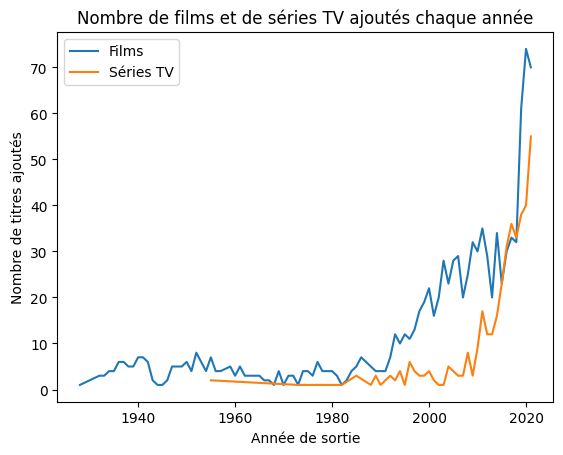

In [ ]:
    # Calculer le nombre de films et de séries ajoutés chaque année
    movies_per_year = df[df['type'] == 'Movie'].groupby('rls_year')['Id'].count()
    tv_shows_per_year = df[df['type'] == 'TV Show'].groupby('rls_year')['Id'].count()

    # Tracer le graphique linéaire
    plt.plot(movies_per_year.index, movies_per_year.values, label='Films')
    plt.plot(tv_shows_per_year.index, tv_shows_per_year.values, label='Séries TV')
    
    # Ajouter les titres et les étiquettes d'axe
    plt.title('Nombre de films et de séries TV ajoutés chaque année')
    plt.xlabel('Année de sortie')
    plt.ylabel('Nombre de titres ajoutés')
    
    # Ajouter la légende
    plt.legend()
    
    # Afficher le graphique
    plt.show()

Ce code calcule et trace un graphique linéaire représentant le nombre de films et de séries ajoutés chaque année. Voici son fonctionnement étape par étape :

movies_per_year = df[df['type'] == 'Movie'].groupby('rls_year')['Id'].count(): Ce code crée une série pandas movies_per_year qui contient le nombre de films ajoutés chaque année. Il filtre le DataFrame df pour ne sélectionner que les lignes où le type est "Movie" (film), puis regroupe les données par année de sortie ("rls_year") et compte le nombre de films pour chaque année.

tv_shows_per_year = df[df['type'] == 'TV Show'].groupby('rls_year')['Id'].count(): Ce code crée une série pandas tv_shows_per_year qui contient le nombre de séries TV ajoutées chaque année. Il filtre le DataFrame df pour ne sélectionner que les lignes où le type est "TV Show" (série TV), puis regroupe les données par année de sortie ("rls_year") et compte le nombre de séries TV pour chaque année.

plt.plot(movies_per_year.index, movies_per_year.values, label='Films'): Cette ligne trace une ligne du graphique pour les films. Elle utilise les années de sortie (movies_per_year.index) comme valeurs de l'axe x et le nombre de films (movies_per_year.values) comme valeurs de l'axe y. Le paramètre label est utilisé pour définir l'étiquette associée à cette ligne (dans ce cas, "Films").

plt.plot(tv_shows_per_year.index, tv_shows_per_year.values, label='Séries TV'): Cette ligne trace une ligne du graphique pour les séries TV. Elle utilise les années de sortie (tv_shows_per_year.index) comme valeurs de l'axe x et le nombre de séries TV (tv_shows_per_year.values) comme valeurs de l'axe y. Le paramètre label est utilisé pour définir l'étiquette associée à cette ligne (dans ce cas, "Séries TV").

plt.title('Nombre de films et de séries TV ajoutés chaque année'): Cette ligne définit le titre du graphique.

plt.xlabel('Année de sortie'): Cette ligne définit le label de l'axe x.

plt.ylabel('Nombre de titres ajoutés'): Cette ligne définit le label de l'axe y.

plt.legend(): Cette ligne ajoute une légende au graphique en utilisant les étiquettes définies pour chaque ligne tracée.

plt.show(): Cette ligne affiche le graphique à l'écran.

In [ ]:
import    networkx    as    nx   
import    plotly.graph_objects    as    go

G = nx.Graph()

for    i, content    in   enumerate (df[   'title'   ]):    
    G.add_node(content)

for    content    in    sorted_similar_content:   
    G.add_edge(title, df.iloc[content[   0   ]][   'title'   ])

pos = nx.spring_layout(G)

node_x = [pos[node][   0   ]    for    node    in    G.nodes()]   
node_y = [pos[node][   1   ]    for    node    in    G.nodes()]

edge_x = []   
edge_y = []   
for    edge    in    G.edges():   
    x0, y0 = pos[edge[   0   ]]   
    x1, y1 = pos[edge[   1   ]]   
    edge_x.extend([x0, x1,    None   ])   
    edge_y.extend([y0, y1,    None   ])

node_trace = go.Scatter(   
    x=node_x,   
    y=node_y,   
    mode=   'markers'   ,   
    marker=   dict   (   
        size=   10   ,   
        color=   'lightblue'   
    ),   
    text=   list   (G.nodes()),   
    hovertemplate=   '%{text}<extra></extra>'   
)

edge_trace = go.Scatter(   
    x=edge_x,   
    y=edge_y,   
    mode=   'lines'   ,   
    line=   dict   (width=   1   , color=   'gray'   ),   
    hoverinfo=   'none'   
)

fig = go.Figure(data=[edge_trace, node_trace],   
               layout=go.Layout(   
                   title=   "Similar Content Graph"   ,   
                   showlegend=   False   ,   
                   hovermode=   'closest'   ,   
                   xaxis=   dict   (showgrid=   False   , zeroline =   False   , showticklabels=   False   ),   
                   yaxis=   dict   (showgrid=   False   , zeroline=   False   , showticklabels=   False   ),  
               ))

fig.show()